In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras 
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from SingularExperimentalFeatures.ExperimentalFeaturesExtractor.histogram_extractor import sample_histograms


Using TensorFlow backend.


In [2]:
BENIGN_DIR = r"D:\MalwareClassifier\Data\feature_merged_scaled\benign_features_scaled.csv"
MALICIOUS_DIR = r"D:\MalwareClassifier\Data\feature_merged_scaled\malicious_features_scaled.csv"

In [3]:
experimental_data = sample_histograms(BENIGN_DIR, MALICIOUS_DIR, 100000, 100000)

In [4]:
experimental_data.head()

0    1    2    3    4    5    6    7    8    9  ...  995  996  997  \
26921   0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
35684   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
98957   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
195667  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  0.0  0.0  0.0   
255841  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  ...  0.0  0.0  0.0   

        998  999  1000  1001  1002  1003  label  
26921   0.0  0.0   0.0   0.0   0.0   0.0      0  
35684   0.0  0.0   0.0   0.0   0.0   0.0      0  
98957   0.0  0.0   0.0   0.0   0.0   0.0      0  
195667  0.0  0.0   0.0   0.0   0.0   0.0      0  
255841  0.0  0.0   0.0   0.0   0.0   0.0      0  

[5 rows x 1005 columns]

In [5]:
target = experimental_data["label"]
target.shape

(200000,)

In [6]:
features = experimental_data.drop("label", axis=1)
features.shape

(200000, 1004)

In [7]:
X_features = np.array(features)
Y_labels = np.array(target)

In [8]:
padding = np.array([0]*20)

In [9]:
X_features_complete = np.empty([200000, 1024])

for i in range(len(X_features)):
    X_features_complete[i] = np.append(X_features[i], padding)

In [10]:
len(X_features_complete[0])

1024

In [11]:
def plot_images(X, Y):
    for i in range(20):
        plt.subplot(5, 4, i+1)
        plt.tight_layout()
        plt.imshow(X[i].reshape(32, 32), cmap='gray')
        plt.title('Malware:{}'.format(Y[i]))
        plt.xticks([])
        plt.yticks([])
    plt.show()

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X_features_complete, Y_labels, test_size=0.10, shuffle=True)


In [11]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

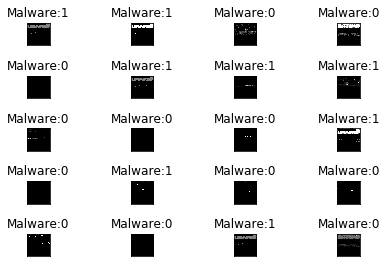

In [14]:
plot_images(X_train, Y_train)

In [12]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(32, 32, 1)))
model.add(MaxPool2D(strides=2))
model.add(Conv2D(filters=48, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(strides=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(1, activation='softmax'))

In [13]:
model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 48)        38448     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 48)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1200)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               307456    
_________________________________________________________________
dense_1 (Dense)              (None, 84)                2

In [14]:
adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='mean_squared_error', metrics=['accuracy'], optimizer=adam)

In [18]:
# reduce_lr = ReduceLROnPlateau(monitor='val_acc', 
#                                 patience=3, 
#                                 verbose=1, 
#                                 factor=0.2, 
#                                 min_lr=1e-6)

In [21]:
model.fit(x=X_train, 
          y=Y_train, 
          batch_size=100,
          epochs=20, 
          steps_per_epoch=1000,
          validation_data=(X_test, Y_test))

Train on 180000 samples, validate on 20000 samples
Epoch 1/20
100000/180000 [===============>..............] - ETA: 1:19 - loss: 0.4998 - accuracy: 0.5002 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00

In [15]:
model.fit(x=X_train, 
          y=Y_train, 
          batch_size=50,
          epochs=20, 
          steps_per_epoch=300,
          validation_data=(X_test, Y_test))


Train on 180000 samples, validate on 20000 samples
Epoch 1/20
 15000/180000 [=>............................] - ETA: 4:00 - loss: 0.4962 - accuracy: 0.5038 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00